In [39]:
# Setup and Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Navigate to the project folder
# %cd YOUR PATH TO THE PROJECT FOLDER IN GOOGLE COLAB

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab_Notebooks/footprints_mtr/journal


In [2]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.8 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import colorcet as cc

In [4]:
from utils import scatterplot_legend
from IPython.display import display, Latex

In [5]:
files_root = "ISA"
save_path = f"{files_root}/Results"

In [6]:
# Calculate the f1 score
file_path = f"{files_root}/Results/svm_table.csv"
df = pd.read_csv(file_path)
df['F1_score'] = 2 * (df['CV_model_precision'] * df['CV_model_recall']) / (df['CV_model_precision'] + df['CV_model_recall'])
df

,Row,Avg_Perf_all_instances,Std_Perf_all_instances,Probability_of_good,Avg_Perf_selected_instances,Std_Perf_selected_instances,CV_model_accuracy,CV_model_precision,CV_model_recall,BoxConstraint,KernelScale,F1_score
0,EMNA,2.100,1.780,0.491,0.905,0.420,91.0,93.9,87.3,0.215,0.203,90.479801
1,PSO,2.028,1.489,0.413,0.877,0.339,92.0,94.5,85.6,0.126,0.184,89.830094
2,RandomSearch,1.486,1.284,0.597,0.774,0.456,88.5,91.0,89.6,1.333,0.376,90.294574
3,Oracle,1.420,1.283,1.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Selector,1.569,1.208,0.638,0.998,0.405,NaN,91.0,52.1,NaN,NaN,66.262753


In [7]:
display(Latex(df[["Row", "F1_score"]].to_latex(index=False)))

<IPython.core.display.Latex object>

In [17]:
# Plot problem class (f_id) in 2D
files_path = f"{files_root}/Results"
dfs = [pd.read_csv(f"{files_path}/matilda_train.csv"), pd.read_csv(f"{files_path}/matilda_test.csv")]
df  = pd.concat(dfs, axis=0)
df.head()

,FID,Z_1,Z_2,ela_conv_conv_prob,ela_curv_grad_norm_min,ela_curv_grad_norm_lq,ela_distr_skewness,ela_distr_number_of_peaks,ela_level_lda_qda_10,ela_level_lda_qda_25,...,ela_meta_quad_w_interact_adj_r2,ic_eps_max,ic_eps_ratio,nbc_nb_fitness_cor,EMNA,PSO,RandomSearch,EMNA_bin,PSO_bin,RandomSearch_bin
0,F1_I1,1.657343,0.886929,1.0,7.010396e-07,3.993571e-08,0.245875,0.000000,0.116773,0.205405,...,1.0,2.949905e-08,0.050000,0.422157,0.618515,0.666315,0.393999,1,1,1
1,F1_I4,2.573960,-0.170207,1.0,7.191740e-07,4.691192e-08,0.234824,0.000000,0.261854,0.243243,...,1.0,4.087081e-08,0.063636,0.444176,1.195625,1.013664,0.369697,1,1,1
2,F1_I5,2.006585,0.523140,1.0,5.840043e-07,4.521655e-08,0.231260,0.000000,0.108280,0.227799,...,1.0,2.488938e-08,0.065909,0.471706,1.122407,0.958500,0.401120,1,1,1
3,F1_I6,2.068723,0.452034,1.0,5.802137e-07,4.279842e-08,0.220792,0.000000,0.175159,0.227799,...,1.0,3.294601e-08,0.061364,0.439870,0.886246,0.897421,0.414479,1,1,1
4,F1_I7,1.875534,0.844300,1.0,7.536755e-07,3.929500e-08,0.230700,0.041667,0.114360,0.263835,...,1.0,2.348914e-08,0.050000,0.402416,0.666378,0.612220,0.388991,1,1,1


In [9]:
df.shape

(1196, 21)

In [10]:
# Splitting the 'FID' column into two parts and removing the letters
df[['f_id', 'i_id']] = df['FID'].str.extract('F(\d+)_I(\d+)')

# Convert these columns to integers if necessary
df['f_id'] = df['f_id'].astype(int)
df['i_id'] = df['i_id'].astype(int)
df = df.drop("FID", axis=1)

df

,Z_1,Z_2,ela_conv_conv_prob,ela_curv_grad_norm_min,ela_curv_grad_norm_lq,ela_distr_skewness,ela_distr_number_of_peaks,ela_level_lda_qda_10,ela_level_lda_qda_25,ela_meta_lin_simple_adj_r2,...,ic_eps_ratio,nbc_nb_fitness_cor,EMNA,PSO,RandomSearch,EMNA_bin,PSO_bin,RandomSearch_bin,f_id,i_id
0,1.657343,0.886929,1.000,7.010396e-07,3.993571e-08,0.245875,0.000000,0.116773,0.205405,0.638983,...,0.050000,0.422157,0.618515,0.666315,0.393999,1,1,1,1,1
1,2.573960,-0.170207,1.000,7.191740e-07,4.691192e-08,0.234824,0.000000,0.261854,0.243243,0.810932,...,0.063636,0.444176,1.195625,1.013664,0.369697,1,1,1,1,4
2,2.006585,0.523140,1.000,5.840043e-07,4.521655e-08,0.231260,0.000000,0.108280,0.227799,0.800462,...,0.065909,0.471706,1.122407,0.958500,0.401120,1,1,1,1,5
3,2.068723,0.452034,1.000,5.802137e-07,4.279842e-08,0.220792,0.000000,0.175159,0.227799,0.700815,...,0.061364,0.439870,0.886246,0.897421,0.414479,1,1,1,1,6
4,1.875534,0.844300,1.000,7.536755e-07,3.929500e-08,0.230700,0.041667,0.114360,0.263835,0.598398,...,0.050000,0.402416,0.666378,0.612220,0.388991,1,1,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,-0.343042,1.849406,0.807,4.128836e-05,2.108646e-06,0.222014,0.000000,0.082272,0.224442,0.243130,...,0.093182,0.246924,1.525281,1.643434,1.457776,0,0,1,24,2
116,-0.639651,2.057253,0.788,3.580585e-05,2.044507e-06,0.225813,0.000000,0.072611,0.169533,0.223697,...,0.086364,0.253822,1.527032,1.641488,1.449380,0,0,1,24,3
117,-0.476017,2.025660,0.811,5.224612e-05,2.242370e-06,0.226131,0.000000,0.072983,0.192793,0.213772,...,0.086364,0.280497,1.498303,1.548272,1.459818,1,0,1,24,21
118,-0.135109,1.815382,0.811,4.975774e-05,2.453578e-06,0.241946,0.000000,0.082272,0.169730,0.272887,...,0.088636,0.340528,1.499363,1.592917,1.452179,1,0,1,24,22


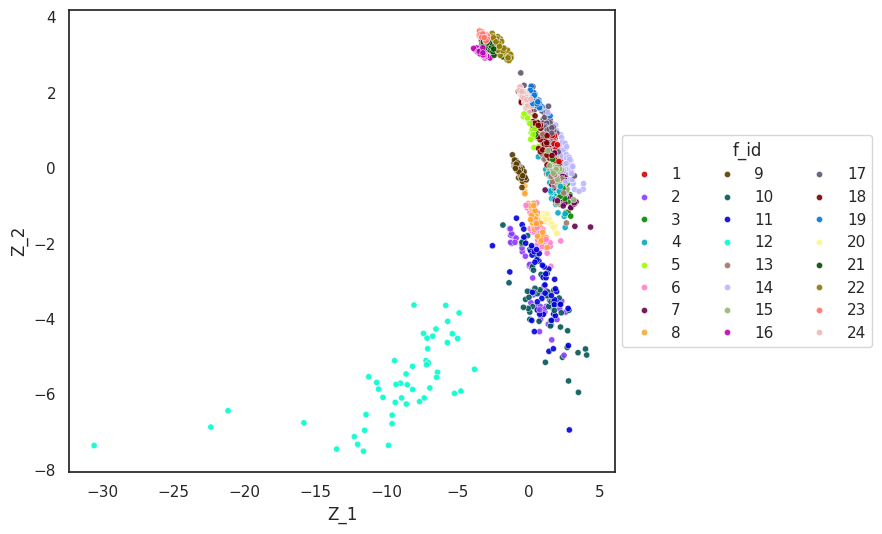

In [15]:
scatterplot_legend(data=df, figsize=(9, 5.5), font_scale=1, title="ISA_problem_classes_2D", save_path=save_path, x="Z_1", y="Z_2",
                   hue="f_id", s=20, alpha=0.9, palette=sns.color_palette(cc.glasbey, len(df["f_id"].unique())))

In [33]:
# Latex Table of the redictions of the SVM models for the 24 problem classes
df = pd.read_csv(f"{files_path}/matilda_test.csv")
df.head()

,FID,Z_1,Z_2,ela_conv_conv_prob,ela_curv_grad_norm_min,ela_curv_grad_norm_lq,ela_distr_skewness,ela_distr_number_of_peaks,ela_level_lda_qda_10,ela_level_lda_qda_25,...,ela_meta_quad_w_interact_adj_r2,ic_eps_max,ic_eps_ratio,nbc_nb_fitness_cor,EMNA,PSO,RandomSearch,EMNA_bin,PSO_bin,RandomSearch_bin
0,F1_I2,1.780582,0.641970,1.0,7.307511e-07,5.383075e-08,0.225420,0.0,0.063694,0.163337,...,1.0,4.541605e-08,0.075000,0.532689,1.446916,1.147932,0.400261,1,1,1
1,F1_I3,2.019868,0.615555,1.0,3.905830e-07,4.806928e-08,0.235257,0.0,0.063694,0.243243,...,1.0,3.294601e-08,0.065909,0.494624,1.237159,1.054423,0.383157,1,1,1
2,F1_I21,1.809258,0.849934,1.0,6.435047e-07,4.611049e-08,0.232238,0.0,0.037467,0.159159,...,1.0,3.575914e-08,0.063636,0.579481,1.222564,1.050437,0.360819,1,1,1
3,F1_I22,2.127881,0.174076,1.0,7.799474e-07,4.888731e-08,0.209401,0.0,0.191083,0.227799,...,1.0,4.785072e-08,0.070455,0.409208,1.256922,1.065896,0.404110,1,1,1
4,F1_I30,1.672059,0.866753,1.0,6.064667e-07,4.086181e-08,0.233055,0.0,0.112157,0.217806,...,1.0,2.635567e-08,0.050000,0.402426,0.731482,0.689249,0.395334,1,1,1


In [34]:
# Splitting the 'FID' column into two parts and removing the letters
df[['f_id', 'i_id']] = df['FID'].str.extract('F(\d+)_I(\d+)')

# Convert these columns to integers if necessary
df['f_id'] = df['f_id'].astype(int)
df['i_id'] = df['i_id'].astype(int)
df = df.drop("FID", axis=1)
df

,Z_1,Z_2,ela_conv_conv_prob,ela_curv_grad_norm_min,ela_curv_grad_norm_lq,ela_distr_skewness,ela_distr_number_of_peaks,ela_level_lda_qda_10,ela_level_lda_qda_25,ela_meta_lin_simple_adj_r2,...,ic_eps_ratio,nbc_nb_fitness_cor,EMNA,PSO,RandomSearch,EMNA_bin,PSO_bin,RandomSearch_bin,f_id,i_id
0,1.780582,0.641970,1.000,7.307511e-07,5.383075e-08,0.225420,0.0,0.063694,0.163337,0.871990,...,0.075000,0.532689,1.446916,1.147932,0.400261,1,1,1,1,2
1,2.019868,0.615555,1.000,3.905830e-07,4.806928e-08,0.235257,0.0,0.063694,0.243243,0.835871,...,0.065909,0.494624,1.237159,1.054423,0.383157,1,1,1,1,3
2,1.809258,0.849934,1.000,6.435047e-07,4.611049e-08,0.232238,0.0,0.037467,0.159159,0.839972,...,0.063636,0.579481,1.222564,1.050437,0.360819,1,1,1,1,21
3,2.127881,0.174076,1.000,7.799474e-07,4.888731e-08,0.209401,0.0,0.191083,0.227799,0.807892,...,0.070455,0.409208,1.256922,1.065896,0.404110,1,1,1,1,22
4,1.672059,0.866753,1.000,6.064667e-07,4.086181e-08,0.233055,0.0,0.112157,0.217806,0.661284,...,0.050000,0.402426,0.731482,0.689249,0.395334,1,1,1,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,-0.343042,1.849406,0.807,4.128836e-05,2.108646e-06,0.222014,0.0,0.082272,0.224442,0.243130,...,0.093182,0.246924,1.525281,1.643434,1.457776,0,0,1,24,2
116,-0.639651,2.057253,0.788,3.580585e-05,2.044507e-06,0.225813,0.0,0.072611,0.169533,0.223697,...,0.086364,0.253822,1.527032,1.641488,1.449380,0,0,1,24,3
117,-0.476017,2.025660,0.811,5.224612e-05,2.242370e-06,0.226131,0.0,0.072983,0.192793,0.213772,...,0.086364,0.280497,1.498303,1.548272,1.459818,1,0,1,24,21
118,-0.135109,1.815382,0.811,4.975774e-05,2.453578e-06,0.241946,0.0,0.082272,0.169730,0.272887,...,0.088636,0.340528,1.499363,1.592917,1.452179,1,0,1,24,22


In [35]:
df = df[["EMNA_bin", "PSO_bin", "RandomSearch_bin", "f_id", "i_id"]]
df

,EMNA_bin,PSO_bin,RandomSearch_bin,f_id,i_id
0,1,1,1,1,2
1,1,1,1,1,3
2,1,1,1,1,21
3,1,1,1,1,22
4,1,1,1,1,30
...,...,...,...,...,...
115,0,0,1,24,2
116,0,0,1,24,3
117,1,0,1,24,21
118,1,0,1,24,22


In [37]:
# Group by f_id and count occurrences of 0s and 1s for each algorithm
grouped_df = df.groupby("f_id")[["EMNA_bin", "PSO_bin", "RandomSearch_bin"]].sum()
print(grouped_df)

      EMNA_bin  PSO_bin  RandomSearch_bin
f_id                                     
1            5        5                 5
2            0        0                 0
3            0        0                 0
4            0        0                 0
5            0        0                 5
6            0        0                 4
7            1        1                 5
8            0        0                 0
9            5        1                 0
10           0        0                 0
11           3        0                 4
12           0        0                 0
13           0        0                 0
14           5        5                 5
15           0        0                 2
16           5        5                 5
17           5        5                 5
18           4        5                 5
19           5        5                 5
20           5        0                 5
21           5        5                 5
22           5        5           

In [38]:
# Function to label the rows based on the conditions
def label_row(row):
    if (row == 5).all():
        return 'easy'
    elif (row == 0).all():
        return 'difficult'
    else:
        # Return the column with the highest sum if the sum is between 0 and 5
        return row.idxmax()

# Group by 'f_id' and sum the values for each algorithm
grouped_df = df.groupby('f_id')[['EMNA_bin', 'PSO_bin', 'RandomSearch_bin']].sum()

# Ensure only numeric columns are used by selecting numeric data types
numeric_columns = grouped_df.select_dtypes(include='number')

# Apply the label_row function to each row in the grouped DataFrame
grouped_df['label'] = numeric_columns.apply(label_row, axis=1)

# Display the final DataFrame with labels
print(grouped_df.to_latex())

\begin{tabular}{lrrrl}
\toprule
 & EMNA_bin & PSO_bin & RandomSearch_bin & label \\
f_id &  &  &  &  \\
\midrule
1 & 5 & 5 & 5 & easy \\
2 & 0 & 0 & 0 & difficult \\
3 & 0 & 0 & 0 & difficult \\
4 & 0 & 0 & 0 & difficult \\
5 & 0 & 0 & 5 & RandomSearch_bin \\
6 & 0 & 0 & 4 & RandomSearch_bin \\
7 & 1 & 1 & 5 & RandomSearch_bin \\
8 & 0 & 0 & 0 & difficult \\
9 & 5 & 1 & 0 & EMNA_bin \\
10 & 0 & 0 & 0 & difficult \\
11 & 3 & 0 & 4 & RandomSearch_bin \\
12 & 0 & 0 & 0 & difficult \\
13 & 0 & 0 & 0 & difficult \\
14 & 5 & 5 & 5 & easy \\
15 & 0 & 0 & 2 & RandomSearch_bin \\
16 & 5 & 5 & 5 & easy \\
17 & 5 & 5 & 5 & easy \\
18 & 4 & 5 & 5 & PSO_bin \\
19 & 5 & 5 & 5 & easy \\
20 & 5 & 0 & 5 & EMNA_bin \\
21 & 5 & 5 & 5 & easy \\
22 & 5 & 5 & 5 & easy \\
23 & 5 & 5 & 5 & easy \\
24 & 2 & 0 & 5 & RandomSearch_bin \\
\bottomrule
\end{tabular}

